# Assignment

## Exploratory Data Analysis - Week One - Tyler

Use the "from the expert" (FTE) jupyter notebook as a starter for this assignment, and ask your instructor questions if you need help.

Use the `churn_data.csv` file to carry out a similar EDA and visualization process as what we did in the FTE. Create at least 2 EDA plots, and create a HTML file with an auto-EDA analysis using pandas-profiling or another auto-EDA Python package. Write a short analysis at the end of the assignment in markdown. 

## Data science process steps this week
We will carry out the first two parts of the CRISP-DM data science process this week:

1. Business understanding

This is customer churn data for a telecommunications company. Customers can have phone as well as other services. The company is looking to reduce customer churn, where customers stop using the company's services and cancel their account. The 'Churn' column has a binary target, yes or no, that denotes if a customer churned. We want to create a machine learning model to predict the Churn target using the other available data in the dataset. Ideally, we will deploy this model to integrate with the company's database, so that a churn risk column is created for each customer. This will enable customer service reps and others to devise and use strategies to reduce churn.


2. Data understanding

Carry out some EDA as we did in the FTE, such as using pandas-profiling. Create a histogram like we did in the FTE, where we plot a numeric column with the target as the 'hue'. Optional challenge: create other plots with the target as the hue, such as bar plots for the categorical columns.


### Package Installation and Imports

In [169]:
import pandas as pd
import seaborn as sns
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import phik

In [170]:
!conda install -c conda-forge pandas pandas-profiling matplotlib openpyxl -y
!conda install -c conda-forge seaborn phik -y

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.



In [171]:
# Setup the Churn dataframe for EDA
# Update the churn_path to match the churn data location
churn_path = '../data/churn_data.csv'
data = pd.read_csv(churn_path)
data

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,Yes,One year,Mailed check,84.80,1990.50,No
7039,2234-XADUH,72,Yes,One year,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,11,No,Month-to-month,Electronic check,29.60,346.45,No
7041,8361-LTMKD,4,Yes,Month-to-month,Mailed check,74.40,306.60,Yes


### Auto Profiling using pandas

In [172]:
report = ProfileReport(data)
report.to_file('churn_eda.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Tyler Osterberg - EDA

### Numerical Exploratory Data Analysis

In [173]:
# Helper functions for EDA

#
# params: dat<DataFrame>
# prints shape, head, tail, info and describe pd methods to console
#
def df_initial_desc(dat):
    print(dat.shape)
    print(dat.head())
    print(dat.tail())
    print(dat.info())
    print(dat.describe())

#
# params: dat<DataFrame>, col<String>
# prints feature descriptions of the column in the dataframe to the console
#
def show_column_desc(dat, col):
    print('Showing Feature Description of ' + col)
    print('Feature is of type' , dat[col].dtype)
    print(dat[col].unique())
    print(dat[col].value_counts())
    print('\n')

#
# params: dat<DataFrame>, col<String>
# returns two dimensionally reduced dataframes for the column specified split by the Churn response
#
def build_plot_feature(dat, col):
    yes_response = dat[dat['Churn'] == 'Yes'][col]
    no_response = dat[dat['Churn'] == 'No'][col]
    return [no_response, yes_response]



In [174]:
df_initial_desc(data)

(7043, 8)
   customerID  tenure PhoneService        Contract              PaymentMethod  \
0  7590-VHVEG       1           No  Month-to-month           Electronic check   
1  5575-GNVDE      34          Yes        One year               Mailed check   
2  3668-QPYBK       2          Yes  Month-to-month               Mailed check   
3  7795-CFOCW      45           No        One year  Bank transfer (automatic)   
4  9237-HQITU       2          Yes  Month-to-month           Electronic check   

   MonthlyCharges  TotalCharges Churn  
0           29.85         29.85    No  
1           56.95       1889.50    No  
2           53.85        108.15   Yes  
3           42.30       1840.75    No  
4           70.70        151.65   Yes  
      customerID  tenure PhoneService        Contract  \
7038  6840-RESVB      24          Yes        One year   
7039  2234-XADUH      72          Yes        One year   
7040  4801-JZAZL      11           No  Month-to-month   
7041  8361-LTMKD       4          Y

Dataset has no null values, so will not need to determine any remediation for missing data

In [175]:
# Iterating through all features to see simple descriptions of the data
for feature in data.columns:
    show_column_desc(data, feature)

Showing Feature Description of customerID
Feature is of type object
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64


Showing Feature Description of tenure
Feature is of type int64
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


Showing Feature Description of PhoneService
Feature is of type object
['No' 'Yes']
Yes    6361
No      682
Name: PhoneService, dtype: int64


Showing Feature Description of Contract
Feat

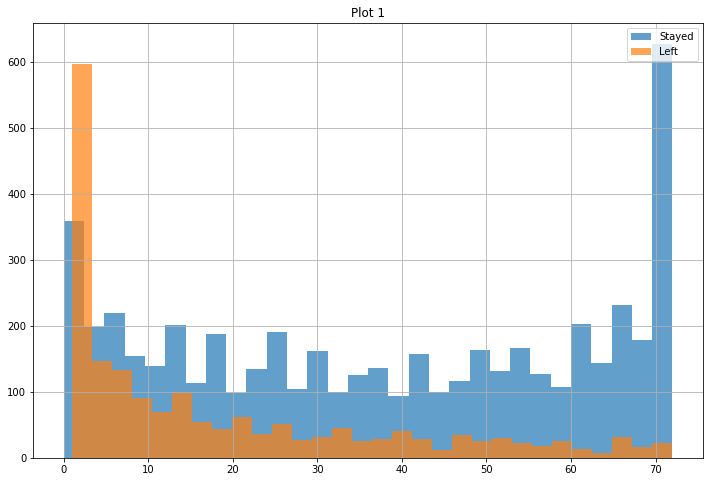

In [176]:
[stay_tenure, leave_tenure] = build_plot_feature(data, 'tenure')

fig = plt.figure(figsize=(12, 8))
plt.title('Plot 1')
stay_tenure.hist(alpha=0.7, bins=30, label='Stayed')
leave_tenure.hist(alpha=0.7, bins=30, label='Left')
plt.legend(loc='upper right')

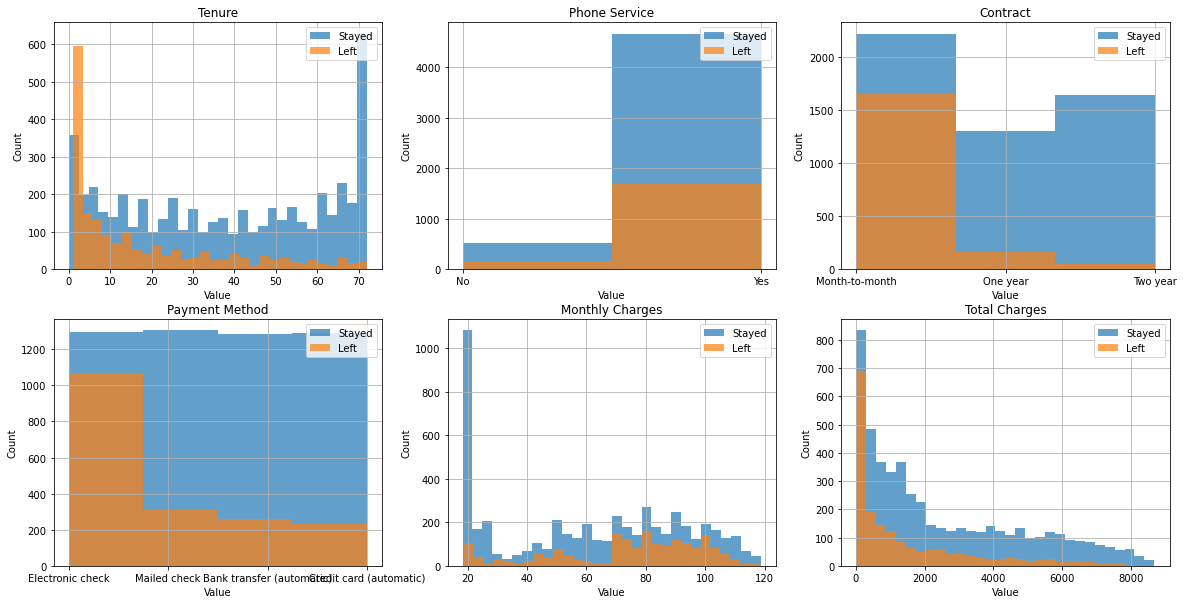

In [177]:
# Split our data by feature and churn
[stay_phone, leave_phone] = build_plot_feature(data, 'PhoneService')
[stay_contract, leave_contract] = build_plot_feature(data, 'Contract')
[stay_payment, leave_payment] = build_plot_feature(data, 'PaymentMethod')
[stay_monthly, leave_monthly] = build_plot_feature(data, 'MonthlyCharges')
[stay_total, leave_total] = build_plot_feature(data, 'TotalCharges')

fig2 = plt.figure(figsize=(20, 10))

# Subplots
## Tenure
ax1 = fig2.add_subplot(231)
ax1.set_xlabel('Value')
ax1.set_ylabel('Count')
ax1.set_title('Tenure')
stay_tenure.hist(alpha=0.7, bins=30, label='Stayed')
leave_tenure.hist(alpha=0.7, bins=30, label='Left')
ax1.legend(loc='upper right')

## Phone Service
ax2 = fig2.add_subplot(232)
ax2.set_xlabel('Value')
ax2.set_ylabel('Count')
ax2.set_title('Phone Service')
stay_phone.hist(alpha=0.7, bins=2, label='Stayed')
leave_phone.hist(alpha=0.7, bins=2, label='Left')
ax2.legend(loc='upper right')

## Contract
ax3 = fig2.add_subplot(233)
ax3.set_xlabel('Value')
ax3.set_ylabel('Count')
ax3.set_title('Contract')
stay_contract.hist(alpha=0.7, bins=3, label='Stayed')
leave_contract.hist(alpha=0.7, bins=3, label='Left')
ax3.legend(loc='upper right')

## Payment Method
ax4 = fig2.add_subplot(234)
ax4.set_xlabel('Value')
ax4.set_ylabel('Count')
ax4.set_title('Payment Method')
stay_payment.hist(alpha=0.7, bins=4, label='Stayed')
leave_payment.hist(alpha=0.7, bins=4, label='Left')
ax4.legend(loc='upper right')

## Monthly Charges
ax4 = fig2.add_subplot(235)
ax4.set_xlabel('Value')
ax4.set_ylabel('Count')
ax4.set_title('Monthly Charges')
stay_monthly.hist(alpha=0.7, bins=30, label='Stayed')
leave_monthly.hist(alpha=0.7, bins=30, label='Left')
ax4.legend(loc='upper right')

## Total Charges
ax6 = fig2.add_subplot(236)
ax6.set_xlabel('Value')
ax6.set_ylabel('Count')
ax6.set_title('Total Charges')
stay_total.hist(alpha=0.7, bins=30, label='Stayed')
leave_total.hist(alpha=0.7, bins=30, label='Left')
ax6.legend(loc='upper right')

<AxesSubplot:>

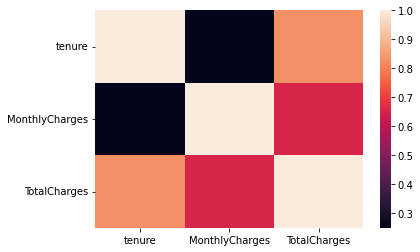

In [178]:
sns.heatmap(data.corr())

interval columns not set, guessing: ['tenure', 'MonthlyCharges', 'TotalCharges']


C:\Users\Tyler\anaconda3\envs\src\lib\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable customerID is large: 7043. Are you sure this is not an interval variable? Analysis for pairs of variables including customerID can be slow.
  warnings.warn(


<AxesSubplot:>

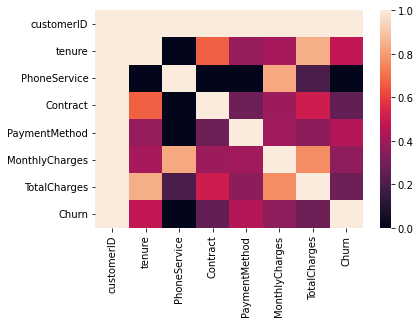

In [180]:
sns.heatmap(data.phik_matrix())

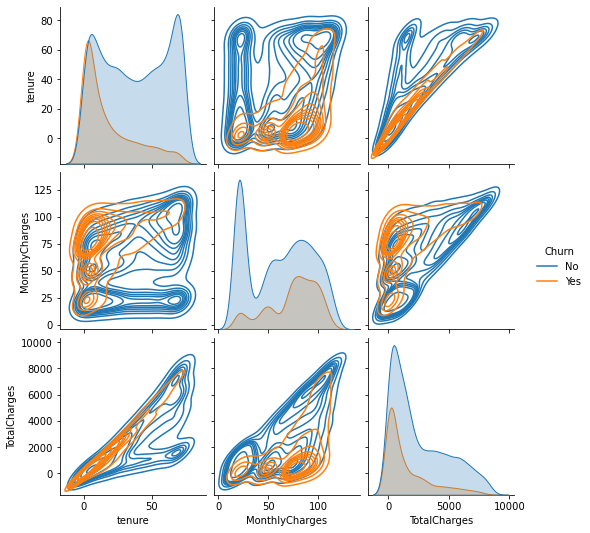

In [179]:

sns.pairplot(data, hue='Churn', kind='kde')

#### Business understanding and open questions

- When looking at the tenure it appears to be unitless, and the data dictionary does not clarify
- Our data appears to have 3 categorical features (PhoneService, Contract, PaymentMethod) and our goal would be to predict a categorical variable "Churn"
- Our data also has 3 quantitative features (tenure, MonthlyCharges, TotalCharges)
- Additionally, it appears that there is a feature that could be engineered out of the PaymentMethod for automatic payment as an additional feature without outside enrichment

## Analysis

After completing our initial EDA for the churn data we have been provided with there are a few initial insights to consider. The first being that there is a disproportionately high amount of churn for those with month to month contracts, those that pay with electronic check, and those with a low tenure. The second being that high monthly charges combined with low tenure, and total charges being near the top for tenure contain a high number of churned accounts. Additionally, we don't have any nulls in our dataset, so we haven't had to fill any NA's. Statistically speaking the columns with high correlation make intuitive sense.  Total payments and tenure are highly correlated, as are phone service and monthly payments. With the next phase goal of creating a churn risk column to be added to inform customer service on how best to mitigate churn when servicing the account there also appears to be a few strategic options to experiment on around incentives for long contracts, payment methods other than electronic check, and lower starting monthly rates.